# Softmax Classifier

In [2]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [3]:
# Funtion to plot the parameters

# The function to plot parameters - visualizes learned weights as images for MNIST classification

def PlotParameters(model): 
    """
    Visualize the learned weight parameters of a neural network as images
    Specifically designed for MNIST digit classification where weights can be
    reshaped into 28x28 images to show what features each class has learned
    
    Args:
        model: PyTorch model with a 'linear' layer containing weights to visualize
    """
    
    # Extract weight matrix from the model's state dictionary
    # model.state_dict()['linear.weight'] gets the weight tensor from the linear layer
    # .data extracts the raw tensor data without gradient information
    # Shape: [10, 784] for MNIST (10 classes, 784 input features from 28x28 images)
    W = model.state_dict()['linear.weight'].data
    
    # Find the minimum and maximum weight values across all parameters
    # This will be used to normalize the color scale across all subplots
    # .min().item() converts tensor to Python scalar (minimum value)
    # .max().item() converts tensor to Python scalar (maximum value)
    w_min = W.min().item()  # Global minimum weight value
    w_max = W.max().item()  # Global maximum weight value
    
    # Create a figure with subplots arranged in a 2x5 grid (10 total plots)
    # This creates 10 subplots to show weights for each of the 10 digit classes (0-9)
    # fig:# The function to plot parameters - visualizes learned weights as images for MNIST classification

def PlotParameters(model): 
    """
    Visualize the learned weight parameters of a neural network as images
    Specifically designed for MNIST digit classification where weights can be
    reshaped into 28x28 images to show what features each class has learned
    
    Args:
        model: PyTorch model with a 'linear' layer containing weights to visualize
    """
    
    # Extract weight matrix from the model's state dictionary
    # model.state_dict()['linear.weight'] gets the weight tensor from the linear layer
    # .data extracts the raw tensor data without gradient information
    # Shape: [10, 784] for MNIST (10 classes, 784 input features from 28x28 images)
    W = model.state_dict()['linear.weight'].data
    
    # Find the minimum and maximum weight values across all parameters
    # This will be used to normalize the color scale across all subplots
    # .min().item() converts tensor to Python scalar (minimum value)
    # .max().item() converts tensor to Python scalar (maximum value)
    w_min = W.min().item()  # Global minimum weight value
    w_max = W.max().item()  # Global maximum weight value
    
    # Create a figure with subplots arranged in a 2x5 grid (10 total plots)
    # This creates 10 subplots to show weights for each of the 10 digit classes (0-9)
    # fig:

In [6]:
# Plot the data - function to display a single MNIST image sample

def show_data(data_sample):
    """
    Display a single MNIST data sample as a grayscale image
    
    Args:
        data_sample: Tuple containing (image_tensor, label)
                    - image_tensor: [1, 28, 28] or [784] tensor
                    - label: Integer class label (0-9)
    """
    
    # Display the image data as a 28x28 grayscale image
    # data_sample[0] gets the image tensor (first element of tuple)
    # .numpy() converts PyTorch tensor to NumPy array for matplotlib
    # .reshape(28, 28) ensures the image is in correct 2D format
    # cmap='gray' displays image in grayscale (black and white)
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    
    # Set the title to show the true label of the image
    # data_sample[1] gets the label (second element of tuple)
    # str() converts the numeric label to string for display
    # Results in titles like "y = 0", "y = 1", etc.
    plt.title('y = ' + str(data_sample[1]))

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Type of data element:  <class 'int'>
The label:  1
The image:  None


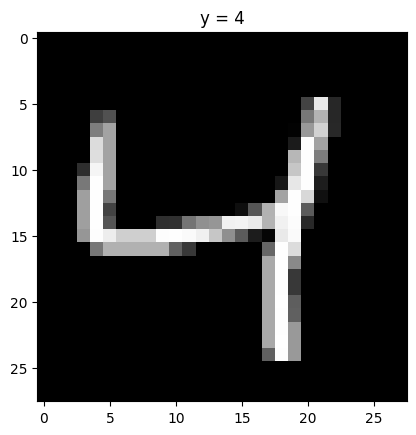

In [8]:
# Creating and printing the dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

# Loading the testing set

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

print("Type of data element: ", type(train_dataset[0][1]))
print("The label: ", train_dataset[3][1])
print("The image: ", show_data(train_dataset[3]))
show_data(train_dataset[2])

In [15]:
# Building the softmax classifier

class SoftMax(nn.Module):
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [16]:
train_dataset[0][0].shape

# flatten the image
input_dim = 28 * 28
output_dim = 10


In [18]:
# Define the Softmax Classifier, Criterion Function, Optimizer, and Train the Model

model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
W:  torch.Size([10, 784])
b:  torch.Size([10])


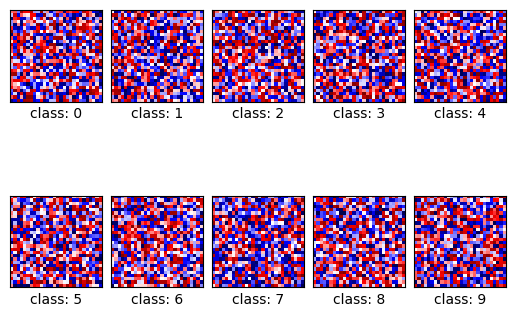

In [19]:
PlotParameters(model)

In [20]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size=5000)


In [24]:
# Training the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y, in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # Performing the prediction on the validation data
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
        
train_model(n_epochs)

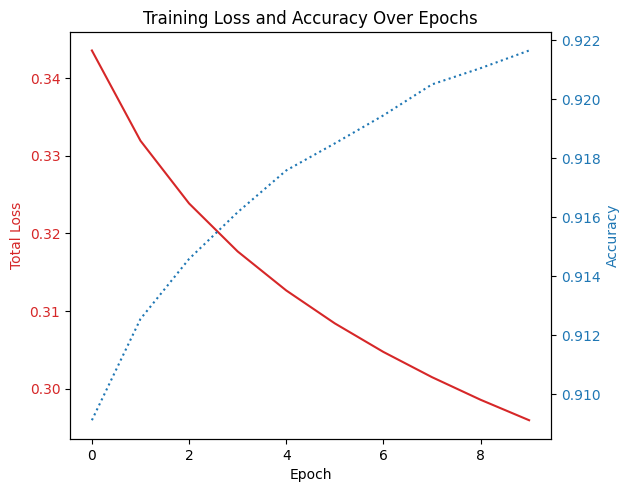

In [34]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Plotting loss on left y-axis
color = 'tab:red'
ax1.set_xlabel('Epoch', color='black')
ax1.set_ylabel('Total Loss', color=color)
ax1.plot(loss_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plotting accuracy on right y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(accuracy_list, color=color, linestyle=':')  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Training Loss and Accuracy Over Epochs')
plt.show()

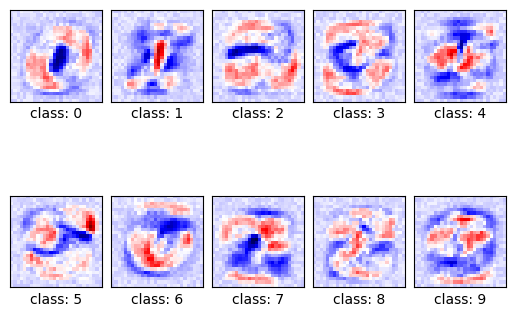

In [35]:
PlotParameters(model)

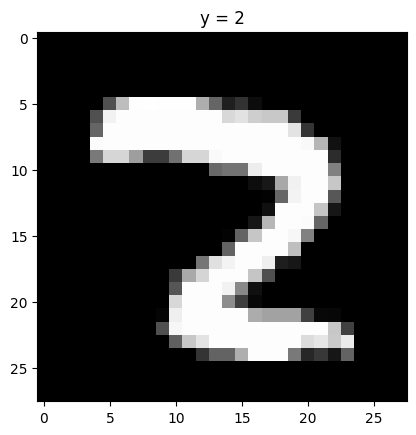

yhat: tensor([7])
probability of class  0.624890148639679


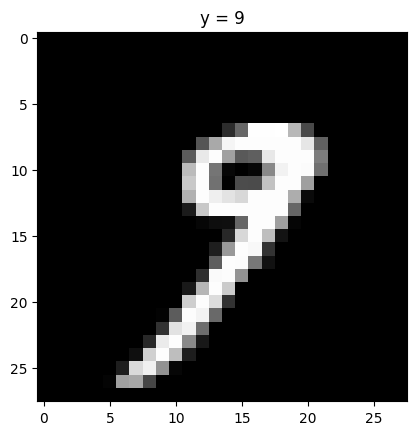

yhat: tensor([7])
probability of class  0.6984257102012634


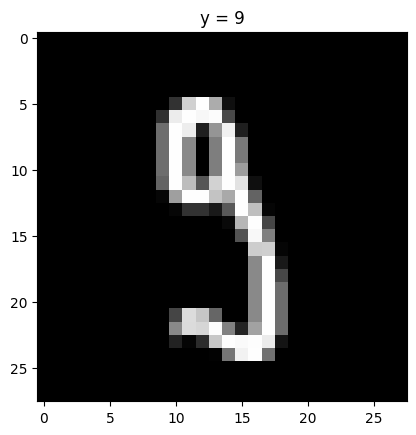

yhat: tensor([5])
probability of class  0.733428418636322


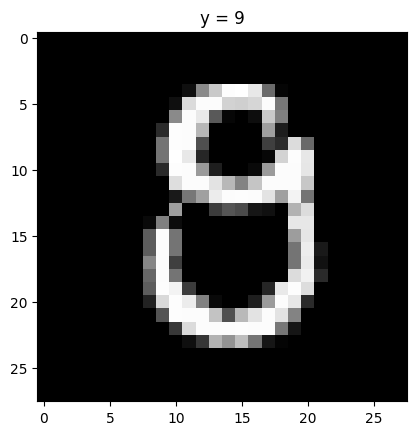

yhat: tensor([8])
probability of class  0.37580519914627075


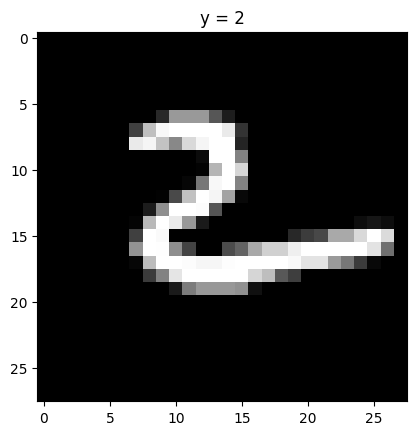

yhat: tensor([6])
probability of class  0.48849472403526306


In [36]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break

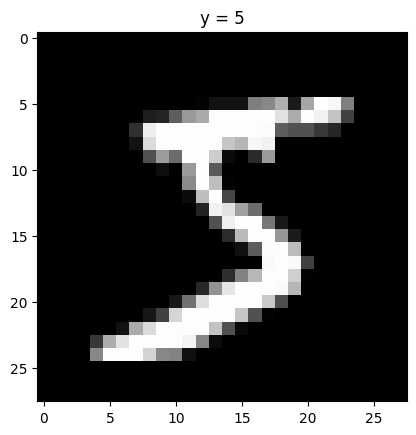

yhat: tensor([5])
probability of class  0.8588302135467529


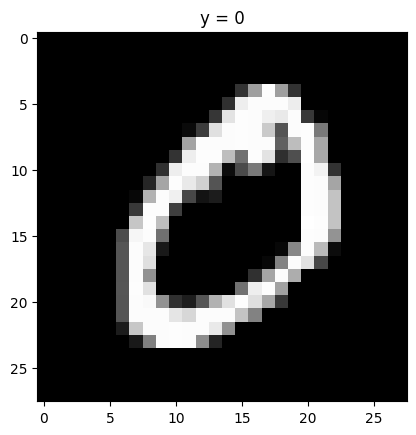

yhat: tensor([0])
probability of class  0.9997678399085999


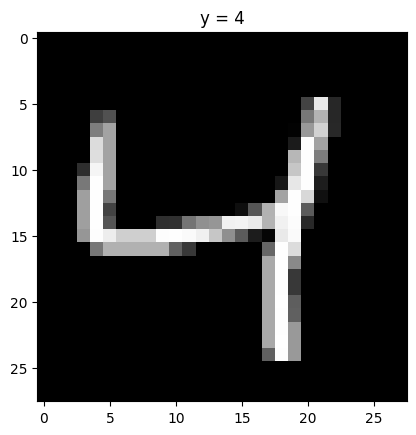

yhat: tensor([4])
probability of class  0.8723948001861572


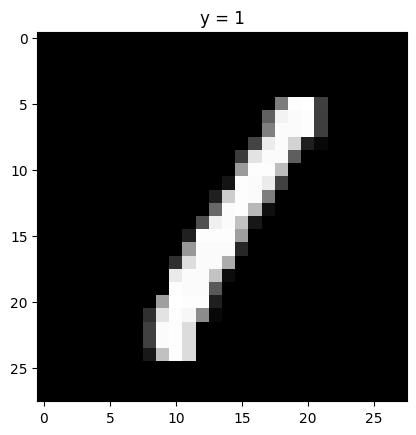

yhat: tensor([1])
probability of class  0.9651017189025879


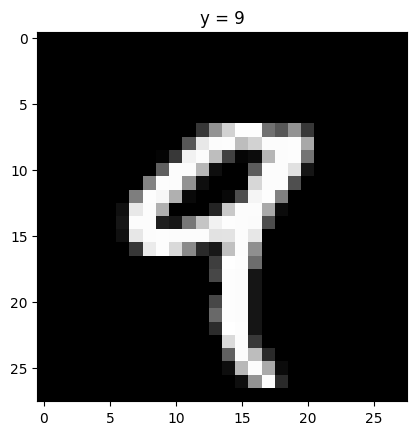

yhat: tensor([9])
probability of class  0.9252362251281738


In [37]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break